In [1]:
import numpy as np
from scipy.linalg import toeplitz

A = np.random.normal(0.,1.,(200,500))
B = toeplitz(np.array(list(range(1,501))))
sumA = A+A
productA = A.dot(A.T)
productAT = A.T.dot(A)
productAB = A.dot(B)
print("sum A+A:")
print(sumA)
print("product AA:")
print(productA)
print('product AAT:')
print(productAT)
print('product AB:')
print(productAB)
def compute(A,B,linda):
    temp = B-linda*np.eye(500)
    return  A@B

sum A+A:
[[ 0.45087085 -1.917891   -3.6973584  ...  1.04601114  5.430708
  -0.86290058]
 [ 3.59131018  1.27626339 -0.57168902 ... -2.52899266 -1.08011654
   0.32421731]
 [-1.78086709  0.52234096 -1.77685851 ...  3.13412425 -4.28768668
   2.77797761]
 ...
 [ 0.64151946 -0.72056268 -0.95373181 ... -3.44334977 -0.60132999
  -4.48385132]
 [ 2.78498141  1.97965684 -2.24683435 ... -0.89778152 -1.58080629
   0.17228631]
 [ 1.81505388  1.01719102 -0.86422823 ...  4.60969579  0.97334332
  -0.17461076]]
product AA:
[[501.10228262  12.95077999   0.85311443 ...  -7.71237886 -25.25657164
  -32.87441381]
 [ 12.95077999 504.68444668  29.82719388 ... -13.9578679   48.2848423
   10.45036771]
 [  0.85311443  29.82719388 511.10075693 ... -15.14841572   2.4457355
   -9.64308265]
 ...
 [ -7.71237886 -13.9578679  -15.14841572 ... 526.70893452 -20.33413531
   40.0302768 ]
 [-25.25657164  48.2848423    2.4457355  ... -20.33413531 522.11098621
  -14.15214638]
 [-32.87441381  10.45036771  -9.64308265 ...  40.03

In [9]:
b=np.array(list(range(0,500)))
x=np.linalg.solve(B,b)
print(x)

[ 9.98003992e-01 -8.04191488e-16  6.66133815e-16 -3.33066907e-16
  3.33066907e-16 -2.22044605e-16  3.33066907e-16 -7.77156117e-16
  1.11022302e-15 -5.55111512e-16 -1.11022302e-16 -2.22044605e-16
  6.66133815e-16 -1.76207860e-26 -7.77156117e-16 -4.44089210e-16
  8.88178420e-16  1.22124533e-15 -1.77635684e-15 -2.22044605e-16
  1.88737914e-15 -1.11022302e-15 -3.33066907e-16 -3.33066907e-16
  1.11022302e-16  1.77635684e-15 -1.66533454e-15  2.22044605e-16
  1.44328993e-15 -1.44328993e-15 -1.11022303e-16 -6.66133815e-16
  2.22044605e-16  5.55111512e-16  2.22044605e-16  2.55351296e-15
 -2.77555756e-15 -2.22044605e-16  1.11022302e-16 -7.77156117e-16
  1.11022302e-15 -4.44089210e-16  3.44169138e-15 -3.44169138e-15
 -2.22044605e-16  2.22044605e-16  4.44089210e-16 -1.11022303e-16
 -2.99760217e-15  4.21884749e-15 -2.99760217e-15  6.66133815e-15
 -3.44169138e-15 -3.77475828e-15  3.88578059e-15 -4.21884749e-15
  4.55191440e-15 -4.77395901e-15  7.54951657e-15 -6.66133815e-15
  3.66373598e-15 -4.10782

In [7]:
import scipy.linalg as LA

print(LA.norm(A,ord=2))
print(LA.norm(B,ord=np.inf))
U,sigma,VT = LA.svd(B)
Max = max(sigma)
Min = min(sigma)
print(Max,Min)

36.099896646872814
125250.0
87334.52045641869 0.5000049348346907


In [10]:
import scipy.linalg as LA
import time
n=200
def PowerIter(Z,esp):
    u = np.ones(n)
    u = u.reshape(n,1)
    max_u = np.max(u)
    sub = np.inf
    iteration = 0
    startTime = time.clock()
    while sub > esp:
        u = Z@u
        temp = np.max(u)
        sub = np.fabs(temp-max_u)
        max_u = temp
        u = u / max_u
        iteration += 1
    endTime = time.clock()
    return max_u, iteration, endTime-startTime, u

esp = 1e-5
Z = np.random.normal(0,1,(n,n))
print("Maxeig, iterations, time/s, eigVec")
print(PowerIter(Z,esp))

Maxeig, iterations, time/s, eigVec


AttributeError: module 'time' has no attribute 'clock'

In [11]:
n=200
for i in range(1,9):
    p = i / 8
    C = np.random.choice(2,(n,n),p=[p,1-p])
    sigma = LA.svd(C,1,0)[1]
    print("n, p , sigma: ",end='')
    print(n, p, sigma)

n, p , sigma: 200 0.125 9.411690668932282
n, p , sigma: 200 0.25 12.00534364750458
n, p , sigma: 200 0.375 13.19232613007056
n, p , sigma: 200 0.5 13.699549029692204
n, p , sigma: 200 0.625 13.53873119826136
n, p , sigma: 200 0.75 12.046157782700218
n, p , sigma: 200 0.875 9.261279750477287
n, p , sigma: 200 1.0 0.0


In [13]:
def NearNb(A,z):
    B = A - z
    re=np.where(A==np.min(A))
    print(B[re[1][0]-1,re[0][0]-1])


In [14]:
from scipy.optimize import leastsq

import numpy as np

m = 20
n = 10

def func(p,x):
	s = np.random.rand(m)
	for i in range(m):
		tmp = 0.0
		for j in range(n):
			tmp += x[i][j]*p[j]
		s[i] = tmp
	
	return s

def err(p,A,y):
	e = (func(p,A)-y)
	return e
	
A = np.random.rand(m,n)
b = np.random.rand(m)
p = np.random.rand(n)

x = np.linalg.solve(A.T@A,A.T@b)
print(x)
rst = leastsq(err,p,args=(A,b))
x = rst[0]
print(x)


print(np.sum((err(x,A,b)**2)/m))

[-0.00357791 -0.56766809 -0.00134421  0.11167872  0.44074877  0.24346502
 -0.09746235  0.17942796  0.45878234  0.48035971]
[-0.00357801 -0.56766809 -0.00134431  0.11167879  0.44074883  0.24346496
 -0.09746232  0.17942799  0.45878232  0.48035976]
0.049391448173122465


In [16]:
import math
from scipy.optimize import minimize_scalar

func = lambda x: -((math.sin(x-2))**2)*math.e**(-(x**2))
rst = minimize_scalar(func)
print(-rst['fun'])

import numpy as np
from scipy.spatial import distance

X = np.random.randn(10,8)
dm = distance.pdist(X,metric='euclidean')
print(dm)

0.9116854118471548
[3.83580374 5.07923006 5.48660233 4.49844453 2.80260187 5.73547409
 4.63672034 3.52411921 4.35328965 2.85001093 3.59747784 1.66098156
 2.51755014 3.91626356 2.94341753 1.93379352 2.26371029 4.42327108
 3.36520157 4.11661753 5.42106896 3.42034327 3.29103269 3.76993989
 2.8624692  4.77726345 4.08116166 3.22724543 2.71086986 3.88342661
 3.6559857  3.97504353 2.37409601 2.14915787 1.92282439 3.83257567
 4.30900853 2.64654619 3.30997484 4.10170237 3.98782167 3.29815082
 3.35708914 2.02040848 3.15677033]


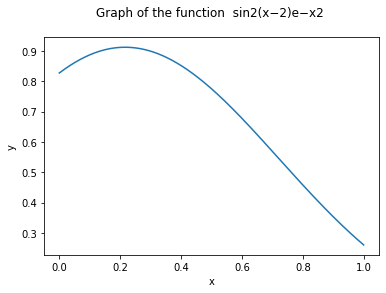

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,500)
y = (np.sin(x-2)**2)*np.exp(-x**2)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of the function  sin2(x−2)e−x2 \n')
plt.show()

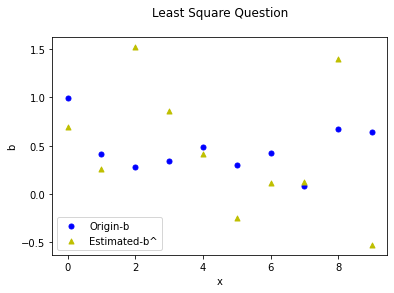

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

x = np.random.rand(20,10)
b = np.random.rand(10,1)
z = np.random.standard_normal((20,1))
y = x.dot(b)-z

b1 = LA.lstsq(x,y,rcond=None)[0]

#绘制
x1 = np.array(list(range(10)))
plt.scatter(x1,b,label='Origin-b',color='b',s=25,marker='o')
plt.scatter(x1,b1,label='Estimated-b^',color='y',s=25,marker='^')

plt.xlabel('x')
plt.ylabel('b')
plt.title('Least Square Question\n')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


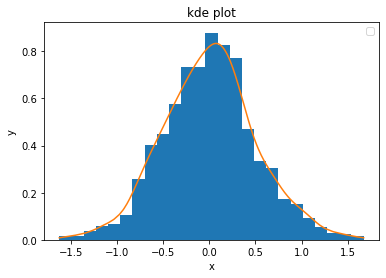

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

z = np.random.normal(0,0.5,1000)
z = sorted(z)
kernel = gaussian_kde(z)

plt.hist(z,bins=25,density=True)
plt.plot(z,kernel.pdf(z))

plt.title('kde plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()